In [1]:
import numpy as np
import matplotlib.pyplot as plt

Much of this chapter is familiar so I'm going to skip around quite a bit.

## The Multivariate Gaussian

For a D-dimensional vector $\mathbf{x}$, the multivariate Gaussian distribution takes the form:
$$\mathcal{N}(\mathbf{x}|\mathbf{\mu}, \mathbf{\Sigma}) = \frac{1}{(2\pi)^{D/2}}\frac{1}{|\mathbf{\Sigma}|^{1/2}} \exp \bigg\{-\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^\intercal \mathbf{\Sigma}^{-1} (\mathbf{x} - \mathbf{\mu}) \bigg\}$$
Where $\mathbf{\mu}$ is the D-dimensional vector of means and $\mathbf{\Sigma}$ is the DxD covariance matrix

***Central Limit Theorem:*** The sum of a set of random variables (which is itself a random variable) has a distribution that becomes increasingly Gaussian as the number of terms in the sum increases.
- This occurs regardless of the distribution(s) from which the individual component random variables are drawn.
- One consequence of this is that the Binomial distribution will trend towards a Gaussian distribution as $N \rightarrow \infty$

### Geometry of the Gaussian

The functional dependence of the Gaussian on $\mathbf{x}$ is through the quadratic term in its exponent: $$\Delta^2 = (\mathbf{x} - \mathbf{\mu})^\intercal \mathbf{\Sigma}^{-1} (\mathbf{x} - \mathbf{\mu})$$

This term, which we will denote $\Delta^2$ is called the ***Mahalanobis Distance*** from $\mathbf{\mu}$ to $\mathbf{x}$. It reduces to the Euclidean distance when $\mathbf{\Sigma}$ is the identity matrix. 

Let's do a quick little demo of how this equates Euclidean distance with the identity matrix. Recall the formula for Euclidean distance:
$$d(\mathbf{x}, \mathbf{y}) = \sqrt{\sum(x_i - y_i)^2}$$
This is equivalent to the square root on the inner sum of the vector $(\mathbf{x} - \mathbf{y})^2$, or euqivalently, the $L_2$ norm of this vector.

In [14]:
x = np.random.randint(0, 10, 10)
y = np.random.randint(0, 10, 10)

dist_1 = np.sqrt(((x - y)**2).sum())**2

dist_2 = (x - y).T @ np.linalg.inv(np.identity(10)) @ (x - y)

dist_3 = (x - y).T @ (x - y)

print(f"d1: {dist_1}, d2: {dist_2}, d3: {dist_3}")

d1: 196.0, d2: 196.0, d3: 196


Note that $(\mathbf{x} - \mathbf{\mu})^\intercal (\mathbf{x} - \mathbf{\mu})$ is equivalent to the inner sum of the vector $(\mathbf{x} - \mathbf{\mu})^2$, and the inverse of the identity matrix is simply the identity matrix itself.

Note also that the covariance matrix $\mathbf{\Sigma}$ is symmetric. Useful properties of symmetric matrices:
- Symmetric matrices have **real** eigenvalues -- $\lambda_i \in \reals \ \forall \ i$ 
- Eigenvectors corresponding to the eigenvalues of symmetric matrices are **orthogonal**
- Symmetric matrices are always diagonalizable

The eigenvector equation for the covariance matrix is: $$\mathbb{\Sigma} \mathbb{u}_i = \lambda_i \mathbb{u}_i$$
Because the eigenvectors of the covariance matrix are orthogonal, they may be chosen to form an *orthonormal set* such that: $$\mathbb{u}_i^\intercal \mathbb{u}_j = I_{ij} \\ \ \\ I_{ij} = \begin{cases} 1, \ \forall i = j \\ 0, \ \forall i \ne j \end{cases}$$

The covariance matrix may be expressed as an expansion of its eigenvectors in the form: $$\mathbf{\Sigma} = \sum_{i=1}^D \lambda_i \mathbf{u}_i \mathbf{u}_i ^\intercal \ \rightarrow \ \mathbf{\Sigma}^{-1} = \sum_{i=1}^D \frac{1}{\lambda_i} \mathbf{u}_i \mathbf{u}_i^\intercal$$
Then, the Mahalanobis distance may be expressed as: $$ \Delta^2 = \sum_{i=1}^D \frac{y_i^2}{\lambda_i}$$
Where:
$$y_i = \mathbf{u}_i^\intercal (\mathbf{x} - \mathbf{\mu})$$
So, $y_i$ may be interpreted as a new coordinate system defined by the orthonormal verctors $\mathbf{u}_i$ that are shifted and rotated w.r.t. the original $x_i$ coordinates. Then for a vector $\mathbf{y}$: $$\mathbf{y} = \mathbf{U}(\mathbf{x} - \mathbf{\mu})$$
Where $\mathbf{U}$ is a matrix with rows given by $\mathbf{u}_i^\intercal$

### Limitations of the Gaussian

A covariance matrix $\mathbf{\Sigma}$ in $\reals^D$ will have $D(D+1)/2$ independent parameters while $\mathbf{\mu}$ will have $D$ independent parameters. Why $D(D+1)/2$? Because there are $D$ variances along the diagonal and $D(D-1)/2$ *unique* covariances on the off-diagonal. So, the total number of parameters grows quadratically with $D$, which can become computationally expensive.

Another limitation is that the gaussian is unimodal and so can be poor at approximating multimodal distributions. "Thus, the Gaussian distribution can be both too flexible, in the sense of having too many parameters, and too limited in the range of distributions that it can adequately represent."

**Latent Variables**, discussed later, can be used to address both of these problems by creating mixtures of Gaussians. 

### Conditional Distribution

**Property:** If two sets of variables are jointly Gaussian, then the conditional distribution of one set conditioned on the other is also Gaussian. Similarly, the marginal distribution of either is also Gaussian.

Take a multivariate normal RV $\mathbf{x} \sim \mathcal{N}(\mathbf{x}|\mathbf{\mu}, \mathbf{\Sigma})$. Let us partition it into two disjoint subsets $\mathbf{x}_a$ forming the first $M$ components of $\mathbf{x}$ and $\mathbf{x}_b$ comprising the remaining $D-M$ components. Then:
$$\mathbf{x} = \begin{pmatrix} \mathbf{x}_a \\ \mathbf{x}_b \end{pmatrix} \ ; \ \ \mathbf{\mu} = \begin{pmatrix} \mathbf{\mu}_a \\ \mathbf{\mu}_b \end{pmatrix} \ ; \ \ \mathbf{\Sigma} = \begin{pmatrix} \mathbf{\Sigma}_{aa} \ \mathbf{\Sigma}_{ab} \\ \mathbf{\Sigma}_{ba} \ \mathbf{\Sigma}_{bb} \end{pmatrix}$$

The inverse of the covariance matrix (which is necessarily also symmetric) is known as the ***Precision Matrix***, denoted as: $$\mathbf{\Lambda} \equiv \mathbf{\Sigma}^{-1}$$

Let's express the exponent of the density function, $-\frac{1}{2}\Delta^2$ using this partioning:
$$ -\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^\intercal \mathbf{\Sigma}^{-1}(\mathbf{x} - \mathbf{\mu}) = \\ \ \\-\frac{1}{2}(\mathbf{x}_a - \mathbf{\mu}_a)^\intercal \mathbf{\Lambda}_{aa} (\mathbf{x}_a - \mathbf{\mu}_a) -\frac{1}{2}(\mathbf{x}_a - \mathbf{\mu}_a)^\intercal \mathbf{\Lambda}_{ab} (\mathbf{x}_b - \mathbf{\mu}_b) -\frac{1}{2}(\mathbf{x}_b - \mathbf{\mu}_b)^\intercal \mathbf{\Lambda}_{bb} (\mathbf{x}_b - \mathbf{\mu}_b) -\frac{1}{2}(\mathbf{x}_b - \mathbf{\mu}_b)^\intercal \mathbf{\Lambda}_{ba} (\mathbf{x}_a - \mathbf{\mu}_a) $$

We can use this to identify the conditional distribution for $p(\mathbf{x}_a|\mathbf{x}_b)$ by **completing the square** (i.e. determining the mean and covariance of the Gaussian given a quadratic form that defines its exponent terms). Rewriting the exponent:
$$-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^\intercal \mathbf{\Sigma}^{-1}(\mathbf{x} - \mathbf{\mu}) = -\frac{1}{2}\mathbf{x}^\intercal \mathbf{\Sigma}^{-1} \mathbf{x} + \mathbf{x}^\intercal \mathbf{\Sigma}^{-1}\mathbf{\mu} + \text{const}$$

Now, consider $p(\mathbf{x}_a|\mathbf{x}_b)$ with $\mathbf{\mu}_{a|b}$ and $\mathbf{\Sigma}_{a|b}$  in which we take $\mathbf{x}_b$ to be a *constant*. The term that is second-order (so, non-linear) in $\mathbf{x}_a$ is: $$-\frac{1}{2}(\mathbf{x}_a - \mathbf{\mu}_a)^\intercal \mathbf{\Lambda}_{aa} (\mathbf{x}_a - \mathbf{\mu}_a)$$ From which, it is clear that $\mathbf{\Sigma}_{a|b} = \mathbf{\Lambda}^{-1}_{aa}$

Now, taking the terms that are *linear* in $\mathbf{x}_a$: $$\mathbf{x}_a^\intercal \{\mathbf{\Lambda}_{aa}\mathbf{\mu}_a - \mathbf{\Lambda}_{ab}(\mathbf{x}_b - \mathbf{\mu}_b)\}$$
From the symmetry of $\mathbf{\Lambda}$, it follows that $\mathbf{\Lambda}_{ba}^\intercal = \mathbf{\Lambda}_{ab}$
From the rewritten exponent above, the coefficient to $\mathbf{X}_a^\intercal$ must be equal to $\mathbf{\Sigma}_{a|b}^{-1}\mathbf{\mu}_{a|b}$. So, we can replace $\mathbf{x}_a^\intercal$ in the non-linear expression and use it to determine $\mathbf{\mu}_{a|b}$:
$$\mathbf{\mu}_{a|b} = \mathbf{\Sigma}_{a|b}\{\mathbf{\Lambda}_{aa}\mathbf{\mu}_a - \mathbf{\Lambda}_{ab}(\mathbf{x}_b - \mathbf{\mu}_b)\} \\ \ \\ = \mathbf{\mu}_a - \mathbf{\Lambda}_{aa}^{-1}\mathbf{\Lambda}_{ab}(\mathbf{x}_b - \mathbf{\mu}_b)$$
**NOTE:** This mean $\mathbf{\mu}_{a|b}$ is *linear* in $\mathbf{x}_b$

## Baye's Theorem

Consider a Gaussian marginal distribution $p(\mathbf{x})$ and a Gaussian conditional distribution $p(\mathbf{y}|\mathbf{x})$ with a mean that is linear in $\mathbf{x}$ and a covariance that is independent of $\mathbf{x}$. This is a ***Linear-Gaussian Model***. Let's find the distributions of $p(\mathbf{y})$ and $p(\mathbf{x}|\mathbf{y})$. The known marginal and conditional distributions are:
$$p(\mathbf{x}) = \mathcal{N}(\mathbf{x}|\mathbf{\mu}, \ \mathbf{\Lambda}^{-1}) \\ \ \\ p(\mathbf{y}|\mathbf{x}) = \mathcal{N}(\mathbf{y}|\mathbf{A}\mathbf{x} + \mathbf{b}, \ \mathbf{L}^{-1})$$
Where $\mathbf{\mu}$, $\mathbf{A}$, and $\mathbf{b}$ are parameters governing the means, and $\mathbf{\Lambda}$ and $\mathbf{L}$ are precision matrices.\
If $\mathbf{x}$ has $M$ dimensions and $\mathbf{y}$ has $D$ dimensions, then $\mathbf{A}$ has shape $D\times M$. 

Consider the joint distribution over $\mathbf{x}$ and $\mathbf{y}$ - let $\mathbf{z}$ be the RV jointly determined by the two.
$$\mathbf{z} = \begin{bmatrix} \mathbf{x} \\ \mathbf{y} \end{bmatrix}$$
We can express the probability distribution for $\mathbf{z}$ with logs:
$$\ln p(\mathbf{z}) = \ln p(\mathbf{x}) + \ln p(\mathbf{y}|\mathbf{x})$$
$$= -\frac{1}{2} \bigg[ (\mathbf{x}-\mathbf{\mu})^\intercal\mathbf{\Lambda}(\mathbf{x}-\mathbf{\mu}) + (\mathbf{y} - \mathbf{A}\mathbf{x} - \mathbf{b})^\intercal \mathbf{L}(\mathbf{y} - \mathbf{A}\mathbf{x} - \mathbf{b}) \bigg] + \text{const}$$

The second order terms in this equation may be expressed as follows:
$$-\frac{1}{2} \bigg[ \mathbf{x}^\intercal (\mathbf{\Lambda} + \mathbf{A}^\intercal \mathbf{LA}) \mathbf{x} + \mathbf{y}^\intercal \mathbf{Ly} - \mathbf{y}^\intercal \mathbf{LAx} - \mathbf{x}^\intercal \mathbf{A}^\intercal \mathbf{Ly} \bigg]$$ 
$$=-\frac{1}{2} \begin{bmatrix} \mathbf{x} \ \ \mathbf{y} \end{bmatrix} \begin{bmatrix} \mathbf{\Lambda} + \mathbf{A}^\intercal\mathbf{LA} \ \ -\mathbf{A}^\intercal \mathbf{L} \\ -\mathbf{LA} \ \ \ \ \ \ \ \ \ \ \ \ \mathbf{L} \end{bmatrix} \begin{bmatrix} \mathbf{x} \\ \mathbf{y} \end{bmatrix} = -\frac{1}{2} \mathbf{z}^\intercal \mathbf{R} \mathbf{z} $$

So, the middle matrix, $\mathbf{R}$ is the precision matrix for $\mathbf{z}$, which yields a covariance matrix of $\mathbf{R}^{-1}$.
$$\mathbf{R}^{-1} = \begin{bmatrix}\mathbf{\Lambda}^{-1} \ \ \ \ \ \ \ \  \ \ \ \mathbf{\Lambda}^{-1}\mathbf{A}^\intercal \\ \mathbf{A\Lambda}^{-1}  \ \ \ \ \mathbf{L}^{-1} + \mathbf{A\Lambda}^{-1}\mathbf{A}^\intercal \end{bmatrix} \implies \begin{bmatrix} \mathbf{\Sigma}_{xx} \ \ \mathbf{\Sigma}_{xy} \\ \mathbf{\Sigma}_{yx} \ \ \mathbf{\Sigma}_{yy} \end{bmatrix}$$
The mean of the Gaussian distribution over $\mathbf{z}$ is found by considering the lindear terms of its quadratic expansion:
$$\mathbf{x}^\intercal \mathbf{\Lambda\mu} - \mathbf{x}^\intercal \mathbf{A}^\intercal \mathbf{Lb} + \mathbf{y}^\intercal \mathbf{Lb}$$
$$ = \begin{bmatrix} \mathbf{x} \ \ \mathbf{y} \end{bmatrix} \begin{bmatrix} \mathbf{\Lambda\mu} - \mathbf{A}^\intercal \mathbf{Lb} \\ \mathbf{Lb} \end{bmatrix}$$
Completing the square over this quadratic form of $\mathbf{z}$ yields the mean:
$$\mathbb{E}[\mathbf{z}] = \mathbf{R}^{-1} \begin{bmatrix} \mathbf{\Lambda\mu} - \mathbf{A}^\intercal \mathbf{Lb} \\ \mathbf{Lb} \end{bmatrix} = \begin{bmatrix}\mathbf{\mu} \\ \mathbf{A\mu} + \mathbf{b} \end{bmatrix}$$

Then, for the mariginal distribution $p(\mathbf{y})$:
$$\mathbb{E}[\mathbf{y}] = \bf{A\mu} + \bf{b}$$ 
$$\text{cov} = \bf{\Sigma}_{yy} = [\bf{y}] = \bf{L}^{-1} + \bf{A\Lambda}^{-1} \bf{A}^\intercal$$

Finally, from the partitioned joint precision matrix (i.e. partitioned $\bf{R}$), we may derive the mean and covariance of the conditional distribution $p(\bf{x}|\bf{y})$:
$$\mathbb{E}[\bf{x}|\bf{y}] = (\bf{\Lambda} + \bf{A}^\intercal \bf{LA})^{-1} (\bf{A}^\intercal\bf{L}(\bf{y}-\bf{b}) - \bf{\Lambda\mu})$$ 
$$\text{cov}[\bf{x}|\bf{y}] = (\bf{\Lambda} + \bf{A}^\intercal \bf{LA})^{-1}$$

This is effectively a realization of Baye's theorem in which $p(\bf{x})$ is the prior distribution over $\bf{x}$. Upon observing $\bf{y}$, the conditional distribution $p(\bf{x}|\bf{y})$ representes the posterior distribution over $\bf{x}$. Then the joint distribution $p(\bf{z}) = p(\bf{x})p(\bf{y}|\bf{x})$ may be expressed in the form $p(\bf{x}|\bf{y})p(\bf{y})$.

In Summary:
$$p(\mathbf{x}) = \mathcal{N}(\mathbf{x}|\mathbf{\mu}, \ \mathbf{\Lambda}^{-1}) \\ \ \\ p(\mathbf{y}|\mathbf{x}) = \mathcal{N}(\mathbf{y}|\mathbf{A}\mathbf{x} + \mathbf{b}, \ \mathbf{L}^{-1})$$
$$p(\bf y) = \mathcal{N}(y|A\mu + b, \ L^{-1} + A\Lambda^{-1} A^\intercal )$$
$$p(\bf x|y) = \mathcal{N} (x|\Sigma(A^\intercal L (y - b) + \Lambda\mu), \ \Sigma)$$
Where $\bf \Sigma = (\Lambda + A^\intercal L A)^{-1}$

## Mixtures of Gaussians

Linear combinations of Gaussians with appropriately specified means, covariances, and linear coefficients can be used in concert to approximate almost any continuous distribution to an arbitrary accuracy. A *Mixture of Gaussians* is a superposition of Gaussian densities of the form:
$$p(\mathbf{x}) = \sum_{k=1}^K \pi_k \mathcal{N}(\mathbf{x}|\mathbf{\mu}_k,\mathbf{\Sigma}_k); \ \ 0 \le \pi_k \le 1, \ \ \forall \ k$$
Where each of the $k$ component Gaussians have their own mean vectors, $\mathbf{\mu}_k$, and covariance matrices, $\mathbf{\Sigma}_k$. The parameters $\pi_k$ are called the *mixing coefficients*.

We may express $p(\mathbf{x})$ as a sum of marginal densities:
$$p(\mathbf{x}) = \sum_{k=1}^K p(k)p(\mathbf{x}|k)$$
Where,
$$\pi_k = p(k) \\ \mathcal{N}(\mathbf{x}|\mathbf{\mu}_k,\mathbf{\Sigma}_k) = p(\mathbf{x}|k)$$
Crucially, we can specify $\pi_k$ as a probability.

From Baye's theorem, we may derive the posterior probabilities for $k$ conditioned of $\mathbf{x}$:
$$\gamma_k(\mathbf{x}) \equiv p(k|\mathbf{x}) = \frac{p(k)p(\mathbf{x}|k)}{\sum_l p(l) p(\mathbf{x}|l)}; \ \ l \in K \setminus k$$

The log likelihood for a Gaussian mixture is given by:
$$\ln p(\mathbf{X}|\mathbf{\pi, \mu, \Sigma}) = \sum_{n=1}^N\ln \bigg\{\sum_{k=1}^K \pi_k \mathcal{N}(\mathbf{x}_n|\mathbf{\mu}_k, \mathbf{\Sigma}_k)\bigg\}$$
This maximization problem does not have a closed-form analytic solution because of the summation over $k$ inside of the logarithm, but optimization techniques can be used to numerically compute it including ***Expectation Maximization*** which is discussed in Chapter 15...

### Example:

In [2]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt

path = kagglehub.dataset_download("janithwanni/old-faithful")
df = pd.read_csv(path + "\\faithful.csv", index_col=0)
df.head()

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


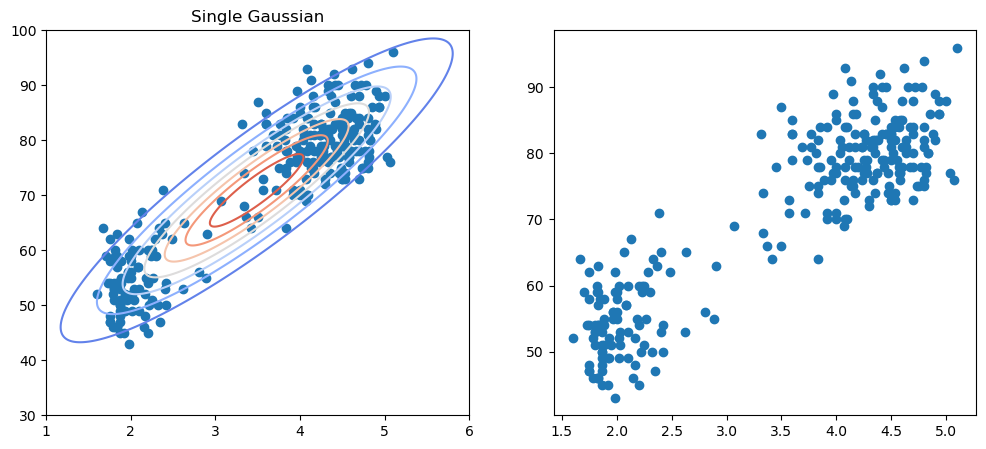

In [4]:
from scipy.stats import multivariate_normal

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

mean = np.mean(df, axis=0)
cov = np.cov(df.T)
gaussian = multivariate_normal(mean, cov)

x, y = np.meshgrid(np.linspace(1,6,1000),np.linspace(30,100,1000))
pos = np.column_stack([x.flat, y.flat])

ax1.scatter(df.eruptions, df.waiting)
ax1.contour(x, y, gaussian.pdf(pos).reshape(x.shape), cmap='coolwarm')
ax1.set_title("Single Gaussian")

ax2.scatter(df.eruptions, df.waiting)

plt.show();

I guess I'll come back after Chapter 15 to explore expectation maximization in this context...

Skipping periodic variables...

## The Exponential Family

The exponential family of distributions is defined to be the set of distributions (both continuous and discrete) that may be expressed in the form: $$p(\mathbf{x}|\mathbf{\eta}) = h(\mathbf{x})g(\mathbf{\eta}) \exp \{\mathbf{\eta}^\intercal \mathbf{u(x)}\}$$
Here the parameters in $\mathbf{\eta}$ are called the *natural parameters* of the distribution and $\mathbf{u(x)}$ is some function ofer $\mathbf{x}$. The coefficient $g(\mathbf{\eta})$ acts as a normalizing coefficient that ensures that the distribution is normalized and sums to 1.

The Bernoulli distribution and Gaussian distribution are both members of the exponential family.

I'll skip the rest atm...

## Nonparametric Methods - Kernel Densities

Let $\mathcal{R}$ by some small region in $D$- dimensional space. The probability mass associated with this region is: $$P = \int_\mathcal{R} p(\mathbf{x})d\mathbf{x}$$
Then, for a dataset of $N$ observations, the number $K$ of points that lie within the region $\mathcal{R}$ is distributed binomially - $K \sim \text{Bin}(K|N,P)$. From which the mean and variance of the proportion of points falling within the region are: $$\mathbb{E}[K/N] = P \\ \text{var}[K/N] = P(1-P)/N$$
$K \approx NP$ for large $N$

If we assume that the region $\mathcal{R}$ is so small that the probability density $p(\mathbf{X})$ is approximately constant throughout, then: $$P \approx p(\mathbf{x})V$$ Where $V$ is the volume of $\mathcal{R}$.

Finally, the density $p(\mathbf{x})$ may then be estimated as: $$p(\mathbf{x}) = \frac{K}{NV}$$
Note that this relies on sufficiently small $\mathcal{R}$ and a sufficiently large $N$.

This result motivates *both* the KNN density estimator and the kernel density estimator. In the case of KNN, we fix $K$ and determine the value of $V$ from the data. In kernel density, we fix $V$ and determine $K$ from the data. So long as $V$ is decreasing in $N$ and $K$ is increasing in $N$, then *both* KNN estimation and kernel density estimation will converge to the true probability density as $N \rightarrow \infty$.

Let $\mathcal{R}$ be a region of $D$-dimensional space centered at the point $\mathbf{x}$. The ***kernel function*** is defined as:
$$k(\mathbf{u}) = \begin{cases} 1, \ \ |u_i| \le 1/2, \ \ i = 1, ..., D \\ 0, \ \ \text{otherwise} \end{cases}$$

Replaceing $\mathbf{u}$ with a more relevant quantity, for some point $\mathbf{x}_n$:
$$k\bigg(\frac{\mathbf{x} - \mathbf{x}_n}{h} \bigg) = \begin{cases} 1, \ \ \big| \frac{x_i - x_{n, i}}{h} \big| \le \frac{1}{2}, \ \ i = 1, ..., D \\ 0, \ \ \text{otherwise} \end{cases}$$

So, the quantity expressed by $k(\cdot)$ will be $1$ if the data point $\mathbf{x}_n$ lies within a cube of side $h$ centered on $\mathbf{x}$, and zero otherwise. Then, the total number of points lying within this cube is:
$$K = \sum_{n=1}^N k \bigg(\frac{\mathbf{x} - \mathbf{x}_n}{h} \bigg)$$

Then the estimated density at $\mathbf{x}$ is:
$$p(\mathbf{x}) = \frac{1}{N} \sum_{n=1}^N \frac{1}{h^D} k \bigg(\frac{\mathbf{x} - \mathbf{x}_n}{h} \bigg) $$
Where $h^D$ is the volume $V$ of a hypercube of side $h$ in $D$-dimensions.

***Gaussian Kernel Density*** estimation replaces the kernel function described above with a smoother Gaussian kernel:
$$p(\mathbf{x}) = \frac{1}{N} \sum_{n=1}^{N} \frac{1}{(2\pi h^2)^{D/2}} \exp \bigg[ -\frac{||\mathbf{x} - \mathbf{x}_n||^2}{2h^2} \bigg] $$
Where $h$ now represents the standard deviation of the Gaussian components.

Now the density model is obtained by placing a Gaussian over each data point and summing their contributions over the entire dataset then normalizing by dividing by $N$.

In general, any kernel function $k(\mathbf{u})$ may be chosen so long as it satisfies two conditions:
$$k(\mathbf{u}) \ \ \ge \ \ 0, \\ \int k(\mathbf{u})d\mathbf{u} \ \ = \ \ 1 $$